## Initial imports

In [1]:
from scm.plams import *

try:
    from ase import Atoms
    from pymatgen.core.structure import Structure
    from pymatgen.analysis.diffraction.xrd import XRDCalculator
except ImportError as e:
    print(
        "You need ASE and pymatgen installed in the AMS python environment to run this example. Install the package for m3gnet to do this."
    )
    print(e)
    exit(1)

## Create ASE atoms object for BaTiO3

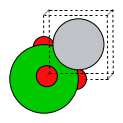

In [2]:
at = Atoms(
    symbols=[
        "Ba",
        "Ti",
        "O",
        "O",
        "O",
    ],
    scaled_positions=[
        [
            0.0,
            0.0,
            0.0,
        ],
        [0.5, 0.5, 0.5],
        [0.0, 0.0, 0.5],
        [0.0, 0.5, 0.0],
        [0.5, 0.0, 0.0],
    ],
    cell=[4.01, 4.01, 4.01],
    pbc=(True, True, True),
)
plot_molecule(at, rotation="-5x,5y,0z");  # show in Jupyter notebook

## Save ASE Atoms to .cif format

In [3]:
fname = "batio3.cif"
at.write(fname)

## Load .cif in pymatgen and calculate XRD

Available radiation sources:

In [4]:
print(f"Available radiation sources: {XRDCalculator.AVAILABLE_RADIATION}")

Available radiation sources: ('CuKa', 'CuKa2', 'CuKa1', 'CuKb1', 'MoKa', 'MoKa2', 'MoKa1', 'MoKb1', 'CrKa', 'CrKa2', 'CrKa1', 'CrKb1', 'FeKa', 'FeKa2', 'FeKa1', 'FeKb1', 'CoKa', 'CoKa2', 'CoKa1', 'CoKb1', 'AgKa', 'AgKa2', 'AgKa1', 'AgKb1')


Let's choose Cu K-alpha (default):

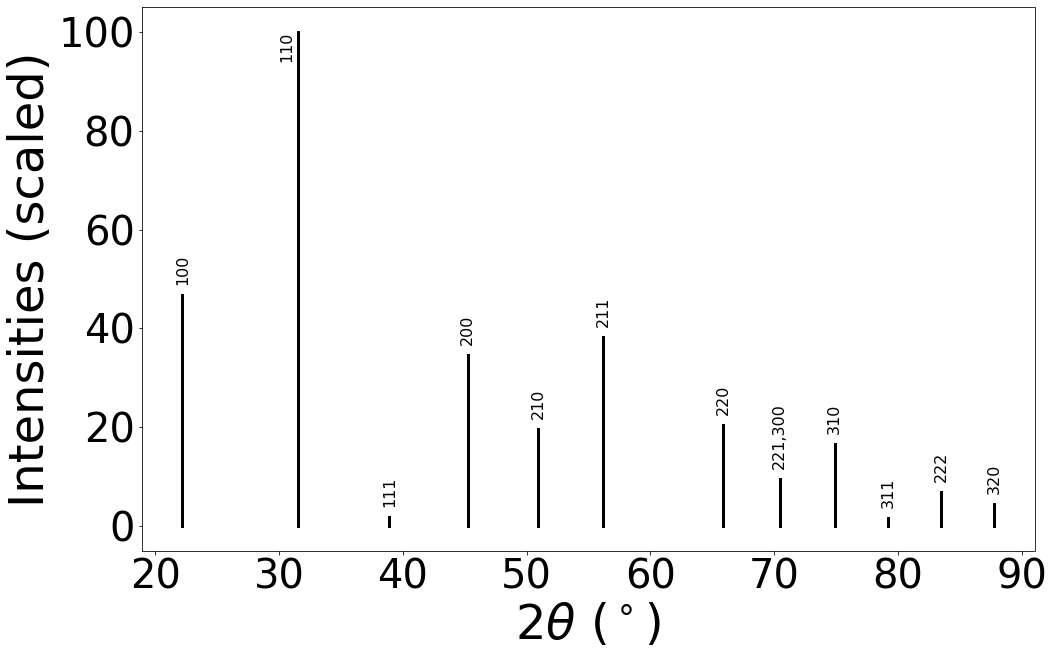

In [5]:
structure = Structure.from_file(fname)
xrd_calc = XRDCalculator(wavelength="CuKa")
xrd_calc.show_plot(structure)

In [6]:
pattern = xrd_calc.get_pattern(structure)
print("2*Theta Intensity hkl d_hkl(angstrom)")
for two_theta, intensity, hkls, d_hkl in zip(pattern.x, pattern.y, pattern.hkls, pattern.d_hkls):
    hkl_tuples = [hkl["hkl"] for hkl in hkls]
    for hkl in hkl_tuples:
        label = ", ".join(map(str, hkl))
        print(f"{two_theta:.2f} {intensity:.2f} {hkl} {d_hkl:.3f}")

2*Theta Intensity hkl d_hkl(angstrom)
22.17 46.84 (1, 0, 0) 4.010
31.55 100.00 (1, 1, 0) 2.835
38.90 1.83 (1, 1, 1) 2.315
45.23 34.58 (2, 0, 0) 2.005
50.92 19.69 (2, 1, 0) 1.793
56.19 38.27 (2, 1, 1) 1.637
65.88 20.48 (2, 2, 0) 1.418
70.44 9.47 (2, 2, 1) 1.337
70.44 9.47 (3, 0, 0) 1.337
74.88 16.60 (3, 1, 0) 1.268
79.23 1.68 (3, 1, 1) 1.209
83.51 6.82 (2, 2, 2) 1.158
87.76 4.44 (3, 2, 0) 1.112
